In [24]:
import numpy as np
import pandas as pd
import env
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools


In [2]:
query = """
    SELECT p.id, transactiondate, parcelid, bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet as squarefeet,
    fips, latitude,  longitude, regionidcity as city, regionidcounty as county, regionidzip as zipcode, yearbuilt, taxvaluedollarcnt as price FROM predictions_2017 p
JOIN properties_2017 USING (parcelid)
WHERE transactiondate BETWEEN '2017-05-01' AND '2017-06-30'
AND bedroomcnt >0 AND bathroomcnt>0 AND `propertylandusetypeid` = 261
    """

In [3]:
df = pd.read_sql(query, env.get_db_url('zillow'))

In [4]:
df.head()

,id,transactiondate,parcelid,bathroomcnt,bedroomcnt,squarefeet,fips,latitude,longitude,city,county,zipcode,yearbuilt,price
0,1248,2017-06-23,11289917,2.0,3.0,1458.0,6037.0,34686163.0,-118113100.0,5534.0,3101.0,97318.0,1970.0,136104.0
1,1772,2017-06-30,11705026,1.0,2.0,1421.0,6037.0,33999877.0,-118291863.0,12447.0,3101.0,96018.0,1911.0,35606.0
2,2028,2017-06-01,14269464,3.0,4.0,2541.0,6059.0,33694636.0,-117912245.0,38032.0,1286.0,96958.0,2003.0,880456.0
3,3273,2017-06-01,11389003,2.0,3.0,1650.0,6037.0,33985377.0,-118361620.0,396550.0,3101.0,96037.0,1949.0,614000.0
4,3429,2017-06-29,11967869,1.0,2.0,693.0,6037.0,34112946.0,-118208106.0,12447.0,3101.0,96023.0,1921.0,274237.0


In [5]:
df.describe()

,id,parcelid,bathroomcnt,bedroomcnt,squarefeet,fips,latitude,longitude,city,county,zipcode,yearbuilt,price
count,14990.000000,1.499000e+04,14990.000000,14990.000000,14990.000000,14990.000000,1.499000e+04,1.499000e+04,14701.000000,14990.000000,14982.000000,14974.000000,1.499000e+04
mean,42507.143763,1.302688e+07,2.329153,3.316878,1943.132355,6049.381721,3.402249e+07,-1.181957e+08,33076.205088,2515.726484,96651.749499,1963.886470,5.416945e+05
std,6467.351347,3.723348e+06,1.019375,0.936250,1001.275394,21.225607,2.760549e+05,3.593028e+05,47688.437636,806.445112,4970.071943,23.314756,7.309388e+05
min,1248.000000,1.071210e+07,1.000000,1.000000,300.000000,6037.000000,3.334085e+07,-1.193883e+08,3491.000000,1286.000000,95982.000000,1878.000000,1.050400e+04
25%,37038.250000,1.150300e+07,2.000000,3.000000,1276.000000,6037.000000,3.382366e+07,-1.184062e+08,12447.000000,1286.000000,96208.000000,1950.000000,1.990028e+05
50%,42558.500000,1.258458e+07,2.000000,3.000000,1680.000000,6037.000000,3.402708e+07,-1.181547e+08,24812.000000,3101.000000,96414.000000,1961.000000,3.851740e+05
75%,48034.750000,1.414273e+07,3.000000,4.000000,2346.000000,6059.000000,3.419064e+07,-1.179260e+08,40227.000000,3101.000000,96996.000000,1980.000000,6.449650e+05
max,53501.000000,1.676392e+08,11.000000,12.000000,15450.000000,6111.000000,3.477966e+07,-1.175554e+08,396556.000000,3101.000000,399675.000000,2015.000000,2.385837e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14990 entries, 0 to 14989
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14990 non-null  int64  
 1   transactiondate  14990 non-null  object 
 2   parcelid         14990 non-null  int64  
 3   bathroomcnt      14990 non-null  float64
 4   bedroomcnt       14990 non-null  float64
 5   squarefeet       14990 non-null  float64
 6   fips             14990 non-null  float64
 7   latitude         14990 non-null  float64
 8   longitude        14990 non-null  float64
 9   city             14701 non-null  float64
 10  county           14990 non-null  float64
 11  zipcode          14982 non-null  float64
 12  yearbuilt        14974 non-null  float64
 13  price            14990 non-null  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 1.6+ MB


In [7]:
df = df.drop(columns = 'city')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14990 entries, 0 to 14989
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14990 non-null  int64  
 1   transactiondate  14990 non-null  object 
 2   parcelid         14990 non-null  int64  
 3   bathroomcnt      14990 non-null  float64
 4   bedroomcnt       14990 non-null  float64
 5   squarefeet       14990 non-null  float64
 6   fips             14990 non-null  float64
 7   latitude         14990 non-null  float64
 8   longitude        14990 non-null  float64
 9   county           14990 non-null  float64
 10  zipcode          14982 non-null  float64
 11  yearbuilt        14974 non-null  float64
 12  price            14990 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.5+ MB


In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14967 entries, 0 to 14989
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14967 non-null  int64  
 1   transactiondate  14967 non-null  object 
 2   parcelid         14967 non-null  int64  
 3   bathroomcnt      14967 non-null  float64
 4   bedroomcnt       14967 non-null  float64
 5   squarefeet       14967 non-null  float64
 6   fips             14967 non-null  float64
 7   latitude         14967 non-null  float64
 8   longitude        14967 non-null  float64
 9   county           14967 non-null  float64
 10  zipcode          14967 non-null  float64
 11  yearbuilt        14967 non-null  float64
 12  price            14967 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.6+ MB


In [11]:
# convert zip code to categorical
df.zipcode = df.zipcode.astype(int).astype(str)

In [12]:
df.zipcode

0        97318
1        96018
2        96958
3        96037
4        96023
         ...  
14985    97018
14986    97067
14987    96523
14988    97065
14989    96129
Name: zipcode, Length: 14967, dtype: object

In [13]:
fip = {
    'fips': [6037, 6059, 6111],
    'County':['Los Angles', 'Orange', 'Ventura']
}

In [14]:
fips = pd.DataFrame(fip)

In [15]:
fips

,fips,County
0,6037,Los Angles
1,6059,Orange
2,6111,Ventura


In [16]:
df = pd.merge(df, fips, left_on = 'fips', right_on = 'fips', how = 'left')

In [17]:
df = df.drop(columns = 'fips_county')

KeyError: "['fips_county'] not found in axis"

In [23]:
df.head(3)

,id,transactiondate,parcelid,bathroomcnt,bedroomcnt,squarefeet,fips,latitude,longitude,county,zipcode,yearbuilt,price,County
0,1248,2017-06-23,11289917,2.0,3.0,1458.0,6037.0,34686163.0,-118113100.0,3101.0,97318,1970.0,136104.0,Los Angles
1,1772,2017-06-30,11705026,1.0,2.0,1421.0,6037.0,33999877.0,-118291863.0,3101.0,96018,1911.0,35606.0,Los Angles
2,2028,2017-06-01,14269464,3.0,4.0,2541.0,6059.0,33694636.0,-117912245.0,1286.0,96958,2003.0,880456.0,Orange


In [24]:
train, test = train_test_split(df, train_size = .70, random_state = 100)

In [25]:
train.head()

,id,transactiondate,parcelid,bathroomcnt,bedroomcnt,squarefeet,fips,latitude,longitude,county,zipcode,yearbuilt,price,County
14113,52239,2017-06-29,11428689,2.0,3.0,1291.0,6037.0,33905093.0,-118319125.0,3101.0,96106,1957.0,268863.0,Los Angles
3456,36635,2017-05-16,13849709,2.0,4.0,1833.0,6059.0,33942120.0,-117970825.0,1286.0,96186,1956.0,476193.0,Orange
9743,45905,2017-06-13,13065441,2.0,4.0,1200.0,6037.0,34060299.0,-117795042.0,3101.0,96508,1954.0,157915.0,Los Angles
1244,33380,2017-05-05,14413214,4.0,5.0,3586.0,6059.0,33517619.0,-117697388.0,1286.0,96987,1994.0,869805.0,Orange
7511,42594,2017-06-01,12869924,1.0,3.0,1222.0,6037.0,34086978.0,-117713653.0,3101.0,96469,1952.0,461938.0,Los Angles


In [26]:
df[df.zipcode == '399675']

,id,transactiondate,parcelid,bathroomcnt,bedroomcnt,squarefeet,fips,latitude,longitude,county,zipcode,yearbuilt,price,County
2952,35872,2017-05-12,12969877,6.0,5.0,4698.0,6037.0,34160173.0,-117973852.0,3101.0,399675,1994.0,4548320.0,Los Angles
4854,38690,2017-05-23,12969536,2.0,3.0,1532.0,6037.0,34144897.0,-117953095.0,3101.0,399675,1954.0,69537.0,Los Angles
7450,42510,2017-06-01,12969457,3.0,2.0,2143.0,6037.0,34154731.0,-117954681.0,3101.0,399675,1981.0,753001.0,Los Angles
11914,49034,2017-06-21,12969466,2.0,3.0,1895.0,6037.0,34153603.0,-117953027.0,3101.0,399675,1962.0,719700.0,Los Angles


In [27]:
train.groupby('zipcode').price.median()

zipcode
399675    753001.0
95982      33084.0
95983     190816.5
95984     148542.0
95985     691076.5
            ...   
97328     147200.0
97329     263500.0
97330     199000.0
97331     194000.0
97344     101401.0
Name: price, Length: 370, dtype: float64

In [28]:
train.drop(train[train.zipcode == '399675'].index, inplace = True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
median_price = pd.Series(train.groupby('zipcode').price.median())

In [30]:
median_price

zipcode
95982     33084.0
95983    190816.5
95984    148542.0
95985    691076.5
95986    528450.0
           ...   
97328    147200.0
97329    263500.0
97330    199000.0
97331    194000.0
97344    101401.0
Name: price, Length: 369, dtype: float64

In [31]:
train['median_price'] = train.zipcode.map(median_price)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
train.head(4)

,id,transactiondate,parcelid,bathroomcnt,bedroomcnt,squarefeet,fips,latitude,longitude,county,zipcode,yearbuilt,price,County,median_price
14113,52239,2017-06-29,11428689,2.0,3.0,1291.0,6037.0,33905093.0,-118319125.0,3101.0,96106,1957.0,268863.0,Los Angles,202153.5
3456,36635,2017-05-16,13849709,2.0,4.0,1833.0,6059.0,33942120.0,-117970825.0,1286.0,96186,1956.0,476193.0,Orange,313678.0
9743,45905,2017-06-13,13065441,2.0,4.0,1200.0,6037.0,34060299.0,-117795042.0,3101.0,96508,1954.0,157915.0,Los Angles,213202.0
1244,33380,2017-05-05,14413214,4.0,5.0,3586.0,6059.0,33517619.0,-117697388.0,1286.0,96987,1994.0,869805.0,Orange,700522.0


In [33]:
train_plot = train[['bathroomcnt', 'bedroomcnt', 'squarefeet', 'median_price', 'price']]

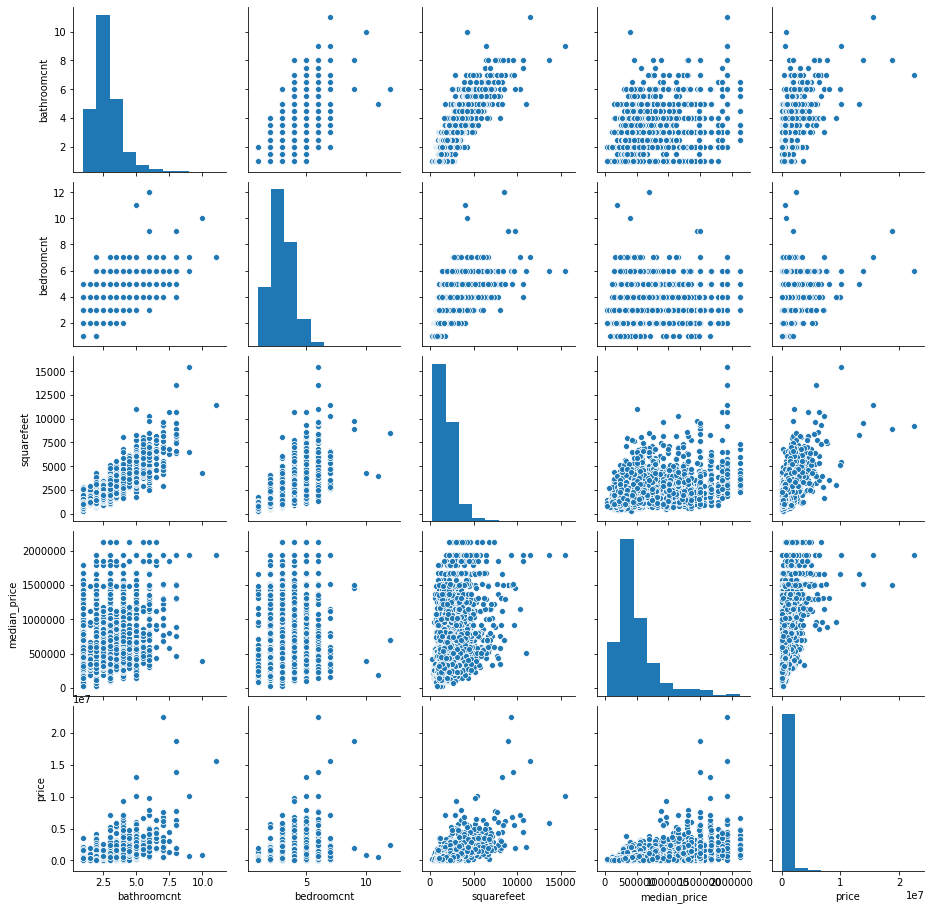

In [34]:
sns.pairplot(train_plot)

In [35]:
cm = train_plot.corr()

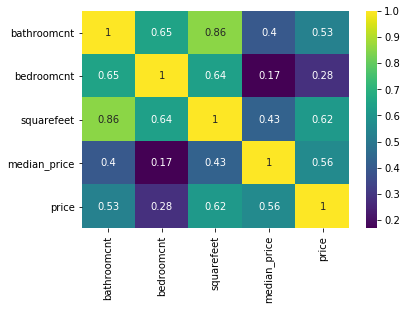

In [36]:
sns.heatmap(cm, annot= True, cmap = 'viridis')

In [37]:
input = pd.read_clipboard()

In [38]:
F = int(input.columns[0])
F

ValueError: invalid literal for int() with base 10: 'itertools.product(A,'

In [ ]:
N = int(input.columns[1])
N

In [ ]:
T = input[N]

In [ ]:
input.index[int(N)]

In [25]:
census = pd.read_csv('census.csv', names = ['age', 'sex', 'education', 'country', 'race', 'marital_status', 'workclass',
            'occupation', 'hours_per_week', 'income', 'capital_gain', 'capital_loss'])

In [26]:
census

,age,sex,education,country,race,marital_status,workclass,occupation,hours_per_week,income,capital_gain,capital_loss
0,age=Middle-aged,sex=Male,education=Bachelors,native-country=United-States,race=White,marital-status=Never-married,workclass=State-gov,occupation=Adm-clerical,hours-per-week=Full-time,income=Small,capital-gain=Low,capital-loss=None
1,age=Senior,sex=Male,education=Bachelors,native-country=United-States,race=White,marital-status=Married-civ-spouse,workclass=Self-emp-not-inc,occupation=Exec-managerial,hours-per-week=Part-time,income=Small,capital-gain=None,capital-loss=None
2,age=Middle-aged,sex=Male,education=HS-grad,native-country=United-States,race=White,marital-status=Divorced,workclass=Private,occupation=Handlers-cleaners,hours-per-week=Full-time,income=Small,capital-gain=None,capital-loss=None
3,age=Senior,sex=Male,education=11th,native-country=United-States,race=Black,marital-status=Married-civ-spouse,workclass=Private,occupation=Handlers-cleaners,hours-per-week=Full-time,income=Small,capital-gain=None,capital-loss=None
4,age=Middle-aged,sex=Female,education=Bachelors,native-country=Cuba,race=Black,marital-status=Married-civ-spouse,workclass=Private,occupation=Prof-specialty,hours-per-week=Full-time,income=Small,capital-gain=None,capital-loss=None
5,age=Middle-aged,sex=Female,education=Masters,native-country=United-States,race=White,marital-status=Married-civ-spouse,workclass=Private,occupation=Exec-managerial,hours-per-week=Full-time,income=Small,capital-gain=None,capital-loss=None
6,age=Senior,sex=Female,education=9th,native-country=Jamaica,race=Black,marital-status=Married-spouse-absent,workclass=Private,occupation=Other-service,hours-per-week=Part-time,income=Small,capital-gain=None,capital-loss=None
7,age=Senior,sex=Male,education=HS-grad,native-country=United-States,race=White,marital-status=Married-civ-spouse,workclass=Self-emp-not-inc,occupation=Exec-managerial,hours-per-week=Over-time,income=Large,capital-gain=None,capital-loss=None
8,age=Middle-aged,sex=Female,education=Masters,native-country=United-States,race=White,marital-status=Never-married,workclass=Private,occupation=Prof-specialty,hours-per-week=Over-time,income=Large,capital-gain=High,capital-loss=None
9,age=Middle-aged,sex=Male,education=Bachelors,native-country=United-States,race=White,marital-status=Married-civ-spouse,workclass=Private,occupation=Exec-managerial,hours-per-week=Full-time,income=Large,capital-gain=Low,capital-loss=None


In [43]:
(census.iloc[0:1,])

,age,sex,education,country,race,marital_status,workclass,occupation,hours_per_week,income,capital_gain,capital_loss
0,age=Middle-aged,sex=Male,education=Bachelors,native-country=United-States,race=White,marital-status=Never-married,workclass=State-gov,occupation=Adm-clerical,hours-per-week=Full-time,income=Small,capital-gain=Low,capital-loss=None


In [45]:
census = np.array(census)

In [137]:
census

array([['age=Middle-aged', 'sex=Male', 'education=Bachelors',
        'native-country=United-States', 'race=White',
        'marital-status=Never-married', 'workclass=State-gov',
        'occupation=Adm-clerical', 'hours-per-week=Full-time',
        'income=Small', 'capital-gain=Low', 'capital-loss=None'],
       ['age=Senior', 'sex=Male', 'education=Bachelors',
        'native-country=United-States', 'race=White',
        'marital-status=Married-civ-spouse',
        'workclass=Self-emp-not-inc', 'occupation=Exec-managerial',
        'hours-per-week=Part-time', 'income=Small', 'capital-gain=None',
        'capital-loss=None'],
       ['age=Middle-aged', 'sex=Male', 'education=HS-grad',
        'native-country=United-States', 'race=White',
        'marital-status=Divorced', 'workclass=Private',
        'occupation=Handlers-cleaners', 'hours-per-week=Full-time',
        'income=Small', 'capital-gain=None', 'capital-loss=None'],
       ['age=Senior', 'sex=Male', 'education=11th',
        

In [249]:
def support(n, lst):
    count = 0
    for i in range(len(census)):
        if (np.isin(census[i], lst)).sum() == n:
            count = count +1
    return count/len(census)

In [254]:
def attribute(n, thd):
    attribute = []
    for i in range(len(census)):
        for comb in list(itertools.combinations(census[i],n)):
            if ((support(n, comb) >= thd) and (support(n, comb) <= 1.0)):
                attribute.append(comb)
    return np.array(attribute)

attribute(2, 0.7)

array([['native-country=United-States', 'race=White'],
       ['native-country=United-States', 'capital-loss=None'],
       ['race=White', 'capital-loss=None'],
       ['income=Small', 'capital-loss=None'],
       ['native-country=United-States', 'race=White'],
       ['native-country=United-States', 'capital-loss=None'],
       ['race=White', 'capital-loss=None'],
       ['income=Small', 'capital-loss=None'],
       ['capital-gain=None', 'capital-loss=None'],
       ['native-country=United-States', 'race=White'],
       ['native-country=United-States', 'capital-loss=None'],
       ['race=White', 'capital-loss=None'],
       ['workclass=Private', 'capital-loss=None'],
       ['income=Small', 'capital-loss=None'],
       ['capital-gain=None', 'capital-loss=None'],
       ['native-country=United-States', 'capital-loss=None'],
       ['workclass=Private', 'capital-loss=None'],
       ['income=Small', 'capital-loss=None'],
       ['capital-gain=None', 'capital-loss=None'],
       ['workcla

In [231]:
len(np.array(attribute))

40830

In [267]:
{'native-country=United-States', 'capital-gain=None'} => {'capital-loss=None'}
{'native-country=United-States', 'capital-loss=None'} => {'capital-gain=None'}
{'capital-gain=None', 'capital-loss=None'} => {'native-country=United-States'}







SyntaxError: invalid syntax (<ipython-input-267-8379e00e254f>, line 1)

In [260]:
'native-country=United-States', 'capital-gain=None' + ',' +'capital-loss=None'

('native-country=United-States', 'capital-gain=None,capital-loss=None')

In [265]:
support(3,['native-country=United-States', 'capital-gain=None','capital-loss=None'])/support(2, ['native-country=United-States', 'capital-gain=None'])

1.0

In [244]:
# list(itertools.combinations(census[i],4))

In [245]:
# count = 0
# for i in range(len(census)):
#     if ('age=Middle-aged' inand 'sex=Male') in census[i]:
#         count +=1
# print(count)

In [62]:
'age=Middle-aged' in census[0] 

True

In [27]:
census.age.value_counts().index.tolist()

['age=Middle-aged', 'age=Senior']

In [28]:
l = []
for col in census.columns:
    l.append(census[col].value_counts().index.tolist())

In [10]:
for col in census.columns:
    print(col)
    col = census[col].value_counts().index.tolist()

age
sex
education
country
race
marital_status
workclass
occupation
hours_per_week
income
capital_gain
capital_loss


In [20]:
l = sum(l, [])

In [29]:
l

[['age=Middle-aged', 'age=Senior'],
 ['sex=Male', 'sex=Female'],
 ['education=Bachelors',
  'education=HS-grad',
  'education=Masters',
  'education=11th',
  'education=9th'],
 ['native-country=United-States',
  'native-country=Cuba',
  'native-country=Jamaica'],
 ['race=White', 'race=Black'],
 ['marital-status=Married-civ-spouse',
  'marital-status=Never-married',
  'marital-status=Divorced',
  'marital-status=Married-spouse-absent'],
 ['workclass=Private', 'workclass=Self-emp-not-inc', 'workclass=State-gov'],
 ['occupation=Exec-managerial',
  'occupation=Handlers-cleaners',
  'occupation=Prof-specialty',
  'occupation=Other-service',
  'occupation=Adm-clerical'],
 ['hours-per-week=Full-time',
  'hours-per-week=Part-time',
  'hours-per-week=Over-time'],
 ['income=Small', 'income=Large'],
 ['capital-gain=None', 'capital-gain=Low', 'capital-gain=High'],
 ['capital-loss=None']]

In [ ]:
# for i in for t in itertools.combinations(l,):
#     print(t)

In [13]:
comb = list(itertools.combinations(l,2))

In [1]:
print(list(itertools.combinations(itertools.chain(*l), 1)))

NameError: name 'itertools' is not defined

In [182]:
A = [1,2,3]
B = [4,5,6]
C = [7,8,9]

In [188]:
list(itertools.product(A, B, C))

[(1, 4, 7),
 (1, 4, 8),
 (1, 4, 9),
 (1, 5, 7),
 (1, 5, 8),
 (1, 5, 9),
 (1, 6, 7),
 (1, 6, 8),
 (1, 6, 9),
 (2, 4, 7),
 (2, 4, 8),
 (2, 4, 9),
 (2, 5, 7),
 (2, 5, 8),
 (2, 5, 9),
 (2, 6, 7),
 (2, 6, 8),
 (2, 6, 9),
 (3, 4, 7),
 (3, 4, 8),
 (3, 4, 9),
 (3, 5, 7),
 (3, 5, 8),
 (3, 5, 9),
 (3, 6, 7),
 (3, 6, 8),
 (3, 6, 9)]

In [71]:
# census = census.strip().split('=')[1]

census['age'].apply(lambda x : x.split('=')[1])

0     Middle-aged
1           aged 
2            aged
Name: age, dtype: object

In [73]:
for col in census.columns:
    census[col] = census[col].apply(lambda x: x.split('=')[1].strip())

In [75]:
census

,age,sex,education,country,race,marital_status,workclass,occupation,hours_per_week,capital_gain,capital_loss
0,Middle-aged,Male,Bachelors,United-States,white,married,state-gov,clerk,full_time,None,None
1,aged,Male,high-school,England,white,married,fed-gov,clerk,park_time,None,None
2,aged,Male,high-school,United-States,white,unmarried,unemployed,clerk,park_time,None,None


In [81]:
(((census.capital_gain == 'None') & (census.capital_loss == 'None')).sum()/census.shape[0]).astype(float)

1.0

In [108]:
census.iloc[0]

age                 Middle-aged
sex                        Male
education             Bachelors
country           United-States
race                      white
marital_status          married
workclass             state-gov
occupation                clerk
hours_per_week        full_time
capital_gain               None
capital_loss               None
Name: 0, dtype: object

In [82]:
(census.age == 'aged').sum()/census.shape[0]

0.6666666666666666

In [40]:
def print1(arr): 
      
    # number of arrays 
    n = len(arr) 
  
    # to keep track of next element  
    # in each of the n arrays 
    indices = [0 for i in range(n)] 
  
    while (1): 
  
        # prcurrent combination 
        for i in range(n): 
            print(arr[i][indices[i]], end = ", ") 
        print() 
  
        # find the rightmost array that has more 
        # elements left after the current element 
        # in that array 
        next = n - 1
        while (next >= 0 and 
              (indices[next] + 1 >= len(arr[next]))): 
            next-=1
  
        # no such array is found so no more 
        # combinations left 
        if (next < 0): 
            return
  
        # if found move to next element in that 
        # array 
        indices[next] += 1
  
        # for all arrays to the right of this 
        # array current index again points to 
        # first element 
        for i in range(next + 1, n): 
            indices[i] = 0

In [41]:
arr = [[] for i in range(3)] 
  
# now entering data 
# [[1, 2, 3], [4], [5, 6]] 
arr[0].append(1) 
arr[0].append(2) 
arr[0].append(3) 
arr[1].append(4) 
arr[2].append(5) 
arr[2].append(6) 

In [34]:
# print1(l)

In [26]:
# def attributeSet(numberofattributes, threshold):
#     census = pd.read_csv('census.csv', names = ['age', 'sex', 'education', 'country', 'race', 'marital_status', 'workclass',
#             'occupation', 'hours_per_week', 'capital_gain', 'capital_loss'])
#     for col in census.columns:
#         census[col] = census[col].apply(lambda x: x.split('=')[1].strip())
#     a = c
#     l = []
#     for i in list(itertools.combinations(a,numberofattributes)):
#         census[i]
        
        
    

In [104]:
attributeSet(2, 0.5)

(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


In [22]:
# import itertools
# a = ['age', 'sex', 'education', 'country', 'race', 'marital_status', 'workclass',
#             'occupation', 'hours_per_week', 'capital_gain', 'capital_loss']
# comb = list(itertools.combinations(a,2))
# comb

In [24]:
# import csv

# results = []
# with open("census.csv") as csvfile:
#     reader = csv.reader(csvfile) 
#     for row in reader: # each row is a list
#         results.append(row)

In [25]:
# results = np.array(results)

In [23]:
# results

In [3]:
from itertools import product

In [6]:
import random

lst = [['a', 'b'], ['c','d'], ['e','f','g','h','i'], ['j','k','l','m','n'], ['o','p']]
new_lst = [i for sublist in lst for i in sublist] # Making it one flat list

def random_combination(lst, n):
    return [random.choice(lst) for i in range(n)]

random_combination(new_lst, 4)

['n', 'a', 'e', 'g']

In [239]:
# import itertools
# from pprint import pprint

# original_lst = [['a', 'b'], ['c','d'], ['e','f','g','h','i'], ['j','k','l','m','n'], ['o','p']]

# def are_two_of_on_same_sublist(items, lst):
#     for sub in lst:
#         for i in items:
#             for n in items:
#                 if i != n and all(x in sub for x in [i, n]):
#                     return True
#                 else:
#                     continue


# def possible_combinations_of_items_in_sub_lists_no_rep(lst, n):
#     new_lst = [i for sublist in lst for i in sublist] # Make it one flat list
#     return [i for i in itertools.combinations(new_lst, n) if not are_two_of_on_same_sublist(i, lst)]

# pprint(possible_combinations_of_items_in_sub_lists_no_rep(l, 5))

In [9]:
lst = [['a', 'b'], ['c','d'], ['e','f','g','h','i'], ['j','k','l','m','n'], ['o','p']]
new_lst = [i for sublist in lst for i in sublist] # Make it one flat list

In [14]:
are_two_of_on_same_sublist('a', lst)

In [268]:
readings = ['1/3/2012 16:00:00\t26.96', '1/4/2012 16:00:00\t27.47', '1/5/2012 16:00:00\t27.728', '1/6/2012 16:00:00\t28.19', '1/9/2012 16:00:00\t28.1', '1/10/2012 16:00:00\t28.15', '1/11/2012 16:00:00\t27.98', '1/12/2012 16:00:00\t28.02', '1/13/2012 16:00:00\t28.25', '1/17/2012 16:00:00\t28.65', '1/18/2012 16:00:00\t28.4', '1/19/2012 16:00:00\t28.435', '1/20/2012 16:00:00\t29.74', '1/23/2012 16:00:00\t29.95', '1/24/2012 16:00:00\t29.5703', '1/25/2012 16:00:00\t29.65', '1/26/2012 16:00:00\t29.7', '1/27/2012 16:00:00\t29.53', '1/30/2012 16:00:00\t29.62', '1/31/2012 16:00:00\t29.7', '2/1/2012 16:00:00\t30.05', '2/2/2012 16:00:00\t30.17', '2/3/2012 16:00:00\t30.4', '2/6/2012 16:00:00\t30.22', '2/7/2012 16:00:00\t30.485', '2/8/2012 16:00:00\t30.67', '2/9/2012 16:00:00\t30.8', '2/10/2012 16:00:00\t30.8']



In [269]:
type(readings)

list

In [286]:
readings = [re.split('[ | \t ]', i) for i in readings]

In [290]:
temp = pd.DataFrame(readings, columns = ['date', 'time', 'temp'])
temp

,date,time,temp
0,1/3/2012,16:00:00,26.96
1,1/4/2012,16:00:00,27.47
2,1/5/2012,16:00:00,27.728
3,1/6/2012,16:00:00,28.19
4,1/9/2012,16:00:00,28.1
5,1/10/2012,16:00:00,28.15
6,1/11/2012,16:00:00,27.98
7,1/12/2012,16:00:00,28.02
8,1/13/2012,16:00:00,28.25
9,1/17/2012,16:00:00,28.65


In [284]:
import re
re.split('[ | \t ]', string)

['1/3/2012', '16:00:00', '26.96']

In [282]:
string = '1/3/2012 16:00:00\t26.96'